<a href="https://colab.research.google.com/github/ProgramasParaFisicaDeParticulas/lecturadedatosabiertoscmszmumu-Pioquinto9/blob/main/CMSOpenDataZtoMuMu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
#panda nos permite manipular el archivo csv https://pandas.pydata.org
import pandas as pd
#numpy nos permite hacer operaciones usando vectores https://numpy.org
import numpy as np
#plotly nos permite crear graficas interactivas https://plotly.com/python/
import plotly.express as px
%matplotlib inline
#usamos la liga que está directamente en la página.
particles = pd.read_csv('https://opendata.cern.ch/record/5208/files/Zmumu.csv',delimiter=',')
particles.head()


,Run,Event,pt1,eta1,phi1,Q1,dxy1,iso1,pt2,eta2,phi2,Q2,dxy2,iso2
0,165617,74969122,54.7055,-0.4324,2.5742,1,-0.0745,0.4999,34.2464,-0.9885,-0.4987,-1,0.0712,3.4221
1,165617,75138253,24.5872,-2.0522,2.8666,-1,-0.0554,0.0000,28.5389,0.3852,-1.9912,1,0.0515,0.0000
2,165617,75887636,31.7386,-2.2595,-1.3323,-1,0.0879,0.0000,30.2344,-0.4684,1.8833,1,-0.0876,0.0000
3,165617,75779415,39.7394,-0.7123,-0.3123,1,0.0585,0.0000,48.2790,-0.1956,2.9703,-1,-0.0492,0.0000
4,165617,75098104,41.2998,-0.1571,-3.0408,1,-0.0305,1.2280,43.4508,0.5910,-0.0428,-1,0.0442,0.0000


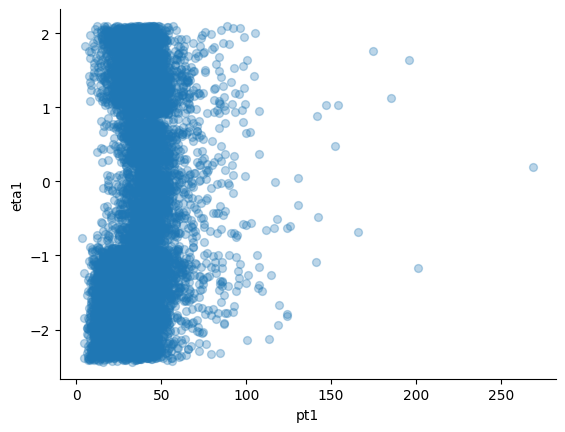

In [25]:
# @title pt1 vs eta1

from matplotlib import pyplot as plt
particles.plot(kind='scatter', x='pt1', y='eta1', s=32, alpha=0.3)
plt.gca().spines[['top', 'right',]].set_visible(False)

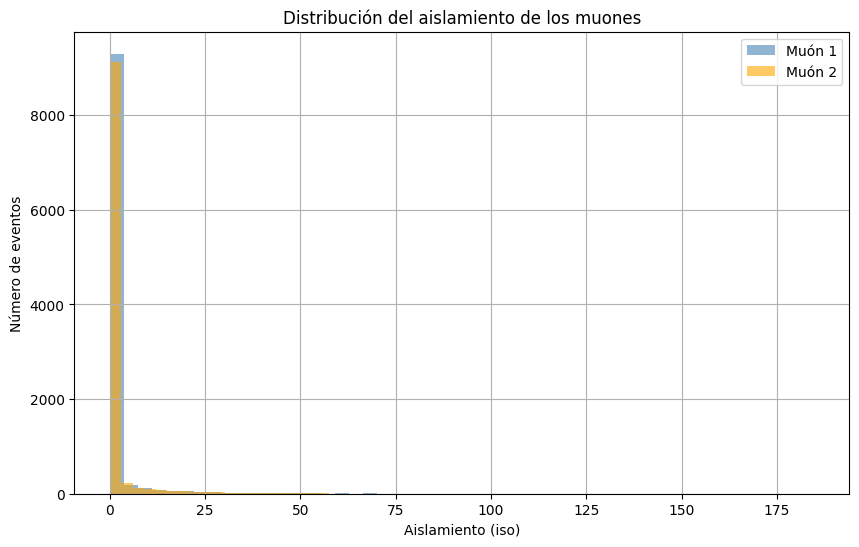

In [48]:
# Histograma del aislamiento de ambos muones
plt.figure(figsize=(10, 6))
plt.hist(particles["iso1"], bins=50, alpha=0.6, label="Muón 1", color="steelblue", histtype="stepfilled")
plt.hist(particles["iso2"], bins=50, alpha=0.6, label="Muón 2", color="orange", histtype="stepfilled")

plt.title("Distribución del aislamiento de los muones")
plt.xlabel("Aislamiento (iso)")
plt.ylabel("Número de eventos")
plt.legend()
plt.grid(True)
plt.show()

In [31]:
# Seleccionar eventos donde ambos muones están aislados
aislados = particles[(particles["iso1"] < 0.15) & (particles["iso2"] < 0.15)]
print(f"Número de eventos con muones aislados: {len(aislados)}")

Número de eventos con muones aislados: 4843


In [27]:
import numpy as np #Calculo de masa Invariantess

def masa_invariante(pt1, eta1, phi1, pt2, eta2, phi2):
    delta_eta = eta1 - eta2
    delta_phi = phi1 - phi2
    return np.sqrt(2 * pt1 * pt2 * (np.cosh(delta_eta) - np.cos(delta_phi)))

particles["Minv"] = masa_invariante(
    particles["pt1"], particles["eta1"], particles["phi1"],
    particles["pt2"], particles["eta2"], particles["phi2"]
)

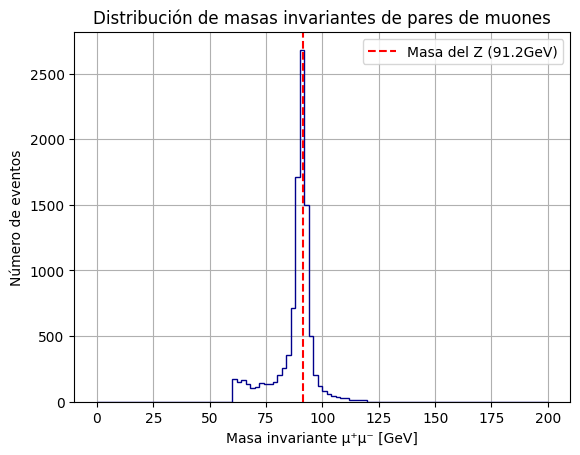

In [29]:
import matplotlib.pyplot as plt #Sin eventos filtrados

plt.hist(particles["Minv"], bins=100, range=(0, 200), histtype='step', color='darkblue')
plt.axvline(x=91.2, color='red', linestyle='--', linewidth=1.5, label='Masa del Z (91.2GeV)')

plt.xlabel("Masa invariante μ⁺μ⁻ [GeV]")
plt.ylabel("Número de eventos")
plt.title("Distribución de masas invariantes de pares de muones")
plt.legend()
plt.grid(True)
plt.show()


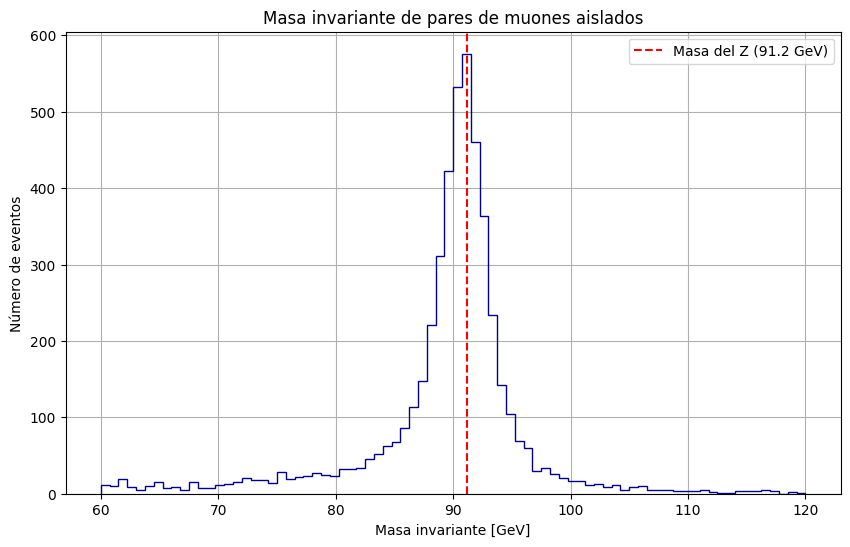

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Filtrar eventos donde ambos muones están aislados
aislados = particles[(particles["iso1"] < 0.15) & (particles["iso2"] < 0.15)]

# Calcular la masa invariante para los eventos filtrados
minv = np.sqrt(
    2 * aislados["pt1"] * aislados["pt2"] * (
        np.cosh(aislados["eta1"] - aislados["eta2"]) -
        np.cos(aislados["phi1"] - aislados["phi2"])
    )
)

# Graficar el histograma de masa invariante
plt.figure(figsize=(10, 6))
plt.hist(minv, bins=80, range=(60, 120), color='darkblue', histtype='step')
plt.axvline(x=91.2, color='red', linestyle='--', label='Masa del Z (91.2 GeV)')

plt.title("Masa invariante de pares de muones aislados")
plt.xlabel("Masa invariante [GeV]")
plt.ylabel("Número de eventos")
plt.legend()
plt.grid(True)
plt.show()

In [25]:
muones_aislados = particles[(particles["iso1"] < 0.15) & (particles["iso2"] < 0.15)] #Filtor para ver si los muones son aisladoss

In [26]:
muones_opuestos = muones_aislados[muones_aislados["Q1"] * muones_aislados["Q2"] == -1] #Para asegurar que tengan cargas opuesta

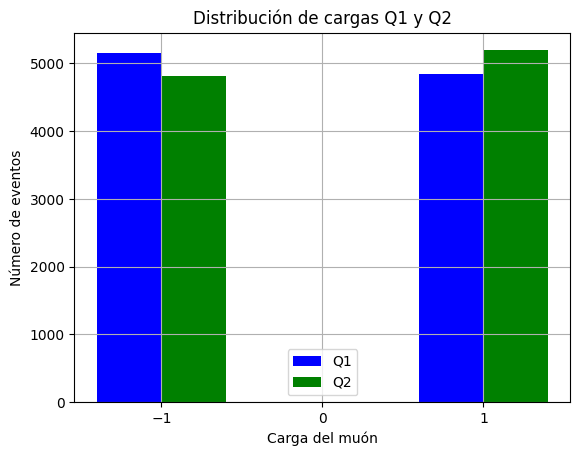

In [12]:


plt.hist([particles["Q1"], particles["Q2"]], bins=[-1.5, -0.5, 0.5, 1.5], #Distribución de carga (+1,-1)
         label=["Q1", "Q2"], color=["blue", "green"], rwidth=0.8)
plt.xticks([-1, 0, 1])
plt.xlabel("Carga del muón")
plt.ylabel("Número de eventos")
plt.title("Distribución de cargas Q1 y Q2")
plt.legend()
plt.grid(True)
plt.show()

In [20]:
# Seleccionar eventos donde ambos muones están aislados
aislados = particles[(particles["iso1"] < 0.15) & (particles["iso2"] < 0.15)]
print(f"Número de eventos con muones aislados: {len(aislados)}")

Número de eventos con muones aislados: 4843


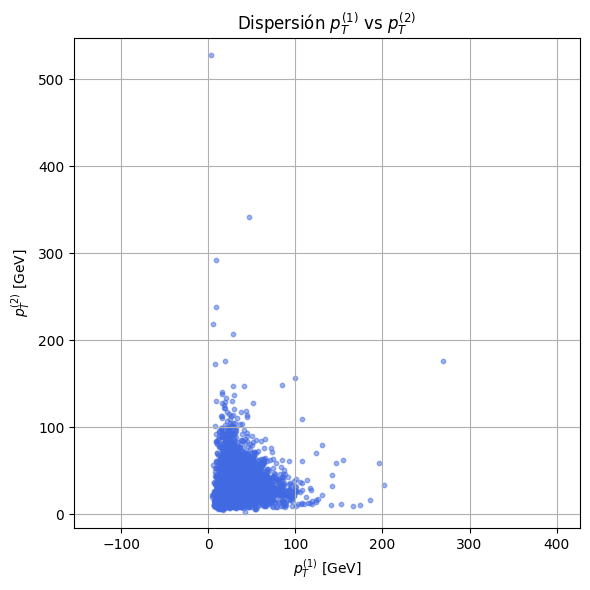

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo CSV (una vez que lo subas)
df = pd.read_csv('https://opendata.cern.ch/record/5208/files/Zmumu.csv')  # Usa el nombre correcto si es distinto

# Verifica los nombres de las columnas con: df.columns
# Asumimos que existen columnas 'pT1' y 'pT2'
pt1 = df['pt1']
pt2 = df['pt2']

# Crear el scatter plot
plt.figure(figsize=(6, 6))
plt.scatter(pt1, pt2, alpha=0.5, s=10, color='royalblue')
plt.xlabel(r'$p_{T}^{(1)}$ [GeV]')
plt.ylabel(r'$p_{T}^{(2)}$ [GeV]')
plt.title(r'Dispersión $p_T^{(1)}$ vs $p_T^{(2)}$')
plt.grid(True)
plt.axis('equal')
plt.tight_layout()
plt.show()

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# === 1. Cargar datos ===
df = pd.read_csv('https://opendata.cern.ch/record/5208/files/Zmumu.csv',delimiter=',')  # Dirctorio
masas = df[''].values  # Asumiendo que la columna con masa invariante se llama 'min'

# === 2. Crear histograma ===
bins = np.linspace(60, 120, 61)  # por ejemplo, de 60 a 120 GeV, 1 GeV por bin
conteos, bordes = np.histogram(masas, bins=bins)
centros = 0.5 * (bordes[:-1] + bordes[1:])

# === 3. Modelo: Gaussiana + fondo exponencial ===
def modelo(m, A, mu, sigma, B, lamb):
    gauss = A * np.exp(-(m - mu)**2 / (2 * sigma**2))
    fondo = B * np.exp(-lamb * m)
    return gauss + fondo

# Estimación inicial
p0 = [max(conteos), 91.2, 2.5, 50, 0.05]

# Ajuste
params, cov = curve_fit(modelo, centros, conteos, p0=p0)
A, mu, sigma, B, lamb = params

# === 4. Estimar eventos de señal y fondo en un rango ===
# Rango: mu ± 2 sigma
r_min = mu - 2 * sigma
r_max = mu + 2 * sigma
mascara = (centros >= r_min) & (centros <= r_max)

obs = np.sum(conteos[mascara])
fondo_estimado = np.sum(B * np.exp(-lamb * centros[mascara]))
senal = obs - fondo_estimado

print(f"Rango de integración: [{r_min:.2f}, {r_max:.2f}] GeV")
print(f"Eventos observados en el rango: {obs:.1f}")
print(f"Eventos estimados del fondo: {fondo_estimado:.1f}")
print(f"Eventos estimados de la señal: {senal:.1f}")

# === 5. Graficar ===
plt.figure(figsize=(8, 5))
plt.bar(centros, conteos, width=np.diff(bins)[0], alpha=0.6, label='Datos')
plt.plot(centros, modelo(centros, *params), 'r-', label='Ajuste total')
plt.plot(centros, A * np.exp(-(centros - mu)**2 / (2 * sigma**2)), 'b--', label='Señal (Gauss)')
plt.plot(centros, B * np.exp(-lamb * centros), 'g--', label='Fondo (Exp)')
plt.axvspan(r_min, r_max, color='gray', alpha=0.2, label='Rango señal ±2σ')
plt.xlabel('Masa invariante [GeV]')
plt.ylabel('Eventos')
plt.title('Ajuste: Señal (Gaussiana) + Fondo (Exponencial)')
plt.legend()
plt.tight_layout()
plt.show()

KeyError: 'Minv'